In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv(r"C:\Users\Amith Reddy\Downloads\Data Trained\FlipRobo\Assignment_10(Housing)\Project-Housing_splitted\train.csv")
df_test = pd.read_csv(r"C:\Users\Amith Reddy\Downloads\Data Trained\FlipRobo\Assignment_10(Housing)\Project-Housing_splitted\test.csv")


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageType        64
GarageCond        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
Exterior2nd        0
Exterior1st        0
dtype: int64

In [5]:
#We can see columns 'PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu' are having more than 50% of null
# values so it is in our best interest to not consider these columns in our model.
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)


In [6]:
df_train.shape

(1168, 76)

In [7]:
df_test.shape

(292, 75)

In [8]:
#Also ID column has no relevance for the model we can drop that column too for the model
df_train = df_train.drop(['Id'],axis=1)
df_test = df_test.drop(['Id'],axis=1)


In [9]:
# Let's Fill NA values in LotFrontage by mean by grouping neighbourhood,LotArea, LotSHape,LotConfig

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train.groupby(['LotArea','LotShape','LotConfig','Neighborhood'])
                                                         ['LotFrontage'].transform('mean'))


In [10]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test.groupby(['LotArea','LotShape','LotConfig','Neighborhood'])
                                                       ['LotFrontage'].transform('mean'))


In [11]:
# Some neighbourhood itself are not having any value so mean is 0 for that, let us consider only attribute LotShape 
# for filling Na values
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train.groupby('LotShape')['LotFrontage'].transform('mean'))
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test.groupby('LotShape')['LotFrontage'].transform('mean'))



In [12]:
df_train.isnull().sum().sort_values(ascending=False)[:20]

GarageCond      64
GarageType      64
GarageYrBlt     64
GarageFinish    64
GarageQual      64
BsmtFinType2    31
BsmtExposure    31
BsmtFinType1    30
BsmtCond        30
BsmtQual        30
MasVnrType       7
MasVnrArea       7
YearBuilt        0
Exterior2nd      0
ExterQual        0
Exterior1st      0
RoofMatl         0
ExterCond        0
Foundation       0
BsmtFinSF1       0
dtype: int64

In [13]:
df_train['GarageCond'] = df_train['GarageCond'].fillna('NA')
df_train['GarageType'] = df_train['GarageType'].fillna('NA')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NA')
df_train['GarageQual'] = df_train['GarageQual'].fillna('NA')
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NA')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NA')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NA')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('NA')
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NA')
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)




df_test['GarageCond'] = df_test['GarageCond'].fillna('NA')
df_test['GarageType'] = df_test['GarageType'].fillna('NA')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('NA')
df_test['GarageQual'] = df_test['GarageQual'].fillna('NA')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('NA')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('NA')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('NA')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('NA')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('NA')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])


In [14]:
df_test.isnull().sum().sort_values(ascending=False)[:20]

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
RoofStyle        0
YearBuilt        0
SaleType         0
dtype: int64

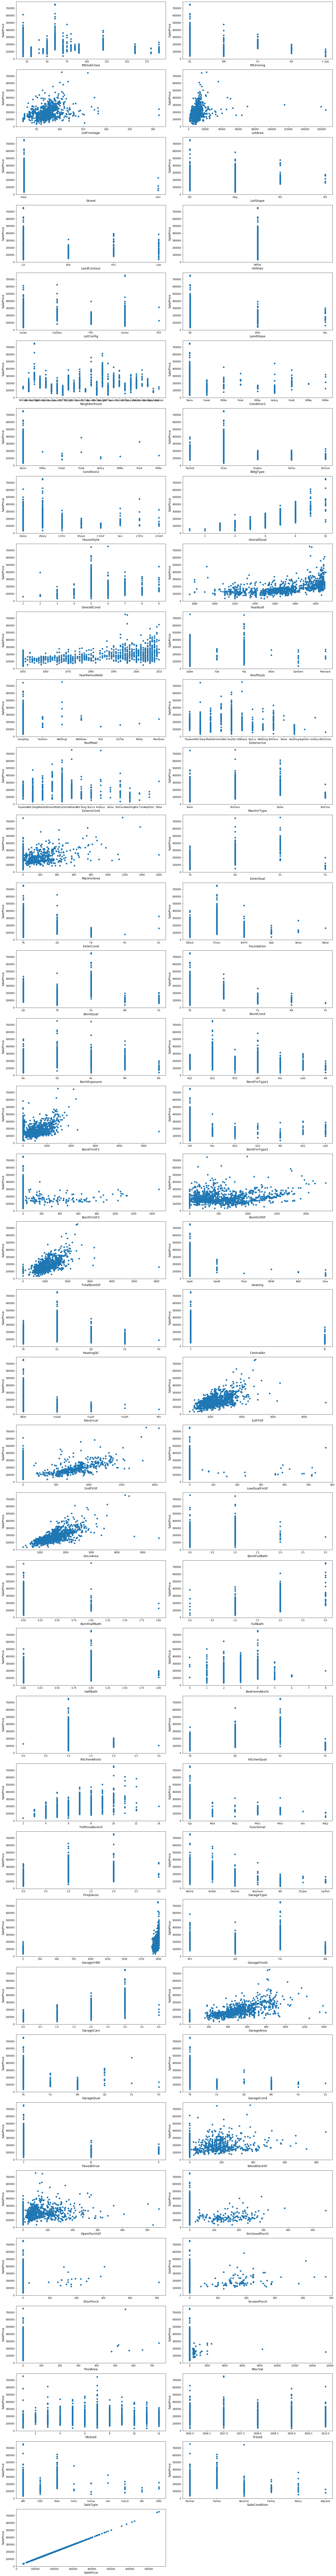

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def draw_scatterplot(dataframe,features,row,col):
    fig = plt.figure(figsize=(20,180))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(row,col,i+1)
        ax.scatter(x=df_train[feature], y=df_train['SalePrice'])
        #dataframe[feature].hist(bins=40,ax=ax,facecolor='midnightblue')
        plt.ylabel('SalePrice', fontsize=13)
        plt.xlabel(feature, fontsize=13)
        #plt.xticks(fontsize=18)
        #plt.yticks(fontsize=18)
        
    fig.tight_layout()
    plt.show()

draw_scatterplot(df_train,df_train.columns,45,2)

In [16]:
# From the above graphs we can remove the outliers

df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Outliers removal is note always safe. We decided to delete these two as they are very huge and really bad 
#( extremely large areas for very low prices).



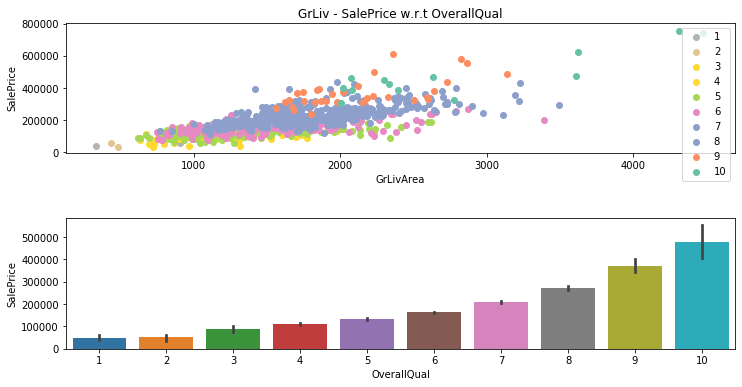

In [17]:
#Let's see some how some variables are affecting the sale price
import seaborn as sns
import matplotlib.gridspec as gridspec
AX = gridspec.GridSpec(2,1)
AX.update(wspace = 0.5, hspace = 0.5)
plt.figure(figsize = (12,6))

ax1  = plt.subplot(AX[0,:])
ax2 = plt.subplot(AX[1,:])

ax1.set_prop_cycle(color=list(sns.color_palette('Set2_r',10)))
for val in range(1,11):
    indeX = df_train.OverallQual == val
    ax1.scatter(df_train.GrLivArea.loc[indeX], df_train.SalePrice.loc[indeX], label = val)
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.legend()
ax1.set_title('GrLiv - SalePrice w.r.t OverallQual')

sns.barplot(x = 'OverallQual', y = 'SalePrice', data = df_train,ax=ax2 )

OverallQual causes different SalePrice even for the same GrLivearea

OverallQual is also having linear relationship with saleprice

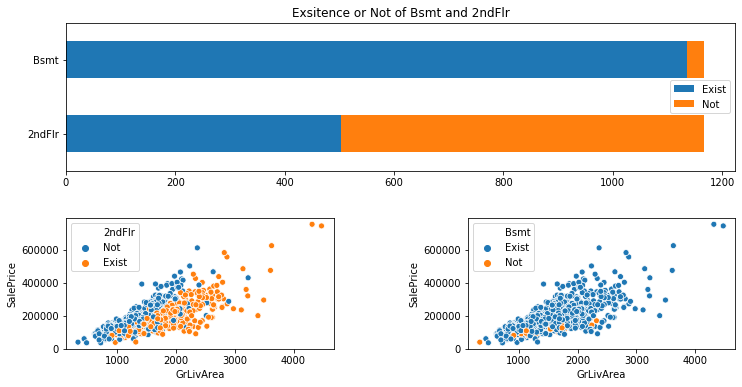

In [18]:
plt.figure(figsize = (12,6))
AX = gridspec.GridSpec(2,2)
AX.update(wspace = 0.5, hspace = 0.5)

ax1  = plt.subplot(AX[0,:])
ax2 = plt.subplot(AX[1,0])
ax3 = plt.subplot(AX[1,1])


gp_train = df_train[['OverallQual','2ndFlrSF', 'TotalBsmtSF', 'SalePrice']].copy()
gp_train['GrLivArea'] = df_train['GrLivArea'].copy()
gp_train['2ndFlr'] = 'Exist'
gp_train.loc[gp_train['2ndFlrSF'] == 0 ,'2ndFlr'] = 'Not'
gp_train['Bsmt'] = 'Exist'
gp_train.loc[gp_train['TotalBsmtSF'] == 0 ,'Bsmt'] = 'Not'
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
tmp = gp_train[['2ndFlr', 'Bsmt']].apply(pd.Series.value_counts).T
tmp.plot.barh(stacked = True, ax = ax1)
ax1.set_title('Exsitence or Not of Bsmt and 2ndFlr', fontsize = 12)

sns.scatterplot(data=gp_train,x='GrLivArea',y='SalePrice',hue='2ndFlr',ax=ax2)
sns.scatterplot(data=gp_train,x='GrLivArea',y='SalePrice',hue='Bsmt',ax=ax3)


2ndFlrSF depressed the power of GrLivArea toward SalePrice

TotalBsmtSF had no impact on SalePrice


In [19]:
groups = df_train.groupby(['FullBath', 'HalfBath'])

In [20]:
groups.first()    

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
FullBath HalfBath                                                              
0        0                 20  C (all)    50.000000     9000   Pave      Reg   
         1                 20       RL    68.000000    50271   Pave      IR1   
         2                 90       RL    60.000000    12900   Pave      Reg   
1        0                 20       RL    70.000000     9170   Pave      Reg   
         1                 20       RL    76.897638    11341   Pave      IR1   
         2                 60       RL    76.897638    13700   Pave      IR1   
2        0                120       RL    76.897638     4928   Pave      IR1   
         1                 60       RL    92.000000     9920   Pave      IR1   
         2                 90       RL    76.897638    18890   Pave      IR1   
3        0                 20       RL    76.897638    32668   Pave      IR1   
         1                 60       RL   160.000000    15623   Pave      IR1   

                  LandContour Utilities LotConfig LandSlope  ...  \
FullBath HalfBath                                            ...   
0        0                Lvl    AllPub    Inside       Gtl  ...   
         1                Low    AllPub    Inside       Gtl  ...   
         2                Lvl    AllPub    Inside       Gtl  ...   
1        0                Lvl    AllPub    Corner       Gtl  ...   
         1                Lvl    AllPub    Inside       Gtl  ...   
         2                Lvl    AllPub    Inside       Gtl  ...   
2        0                Lvl    AllPub    Inside       Gtl  ...   
         1                Lvl    AllPub   CulDSac       Gtl  ...   
         2                Lvl    AllPub    Inside       Gtl  ...   
3        0                Lvl    AllPub   CulDSac       Gtl  ...   
         1                Lvl    AllPub    Corner       Gtl  ...   

                  EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  \
FullBath HalfBath                                                        
0        0                    0         0           0        0       0   
         1                    0         0           0        0       0   
         2                    0         0           0        0       0   
1        0                  184         0           0        0     400   
         1                    0         0          95        0       0   
         2                    0         0         273        0       0   
2        0                    0         0           0        0       0   
         1                    0         0           0        0       0   
         2                  145         0           0        0    8300   
3        0                  200         0           0        0       0   
         1                    0         0           0      555       0   

                   MoSold  YrSold  SaleType  SaleCondition SalePrice  
FullBath HalfBath                                                     
0        0             10    2006        WD        Abnorml     35311  
         1             11    2006        WD         Normal    385000  
         2              1    2008        WD         Alloca    108959  
1        0              4    2007        WD         Normal    140000  
         1              5    2010        WD         Normal    121500  
         2              5    2008        WD         Normal    201800  
2        0              2    2007        WD         Normal    128000  
         1              6    2007        WD         Normal    269790  
         2              8    2007        WD         Normal    190000  
3        0              3    2007        WD         Alloca    200624  
         1              7    2007        WD        Abnorml    745000  

[11 rows x 73 columns]

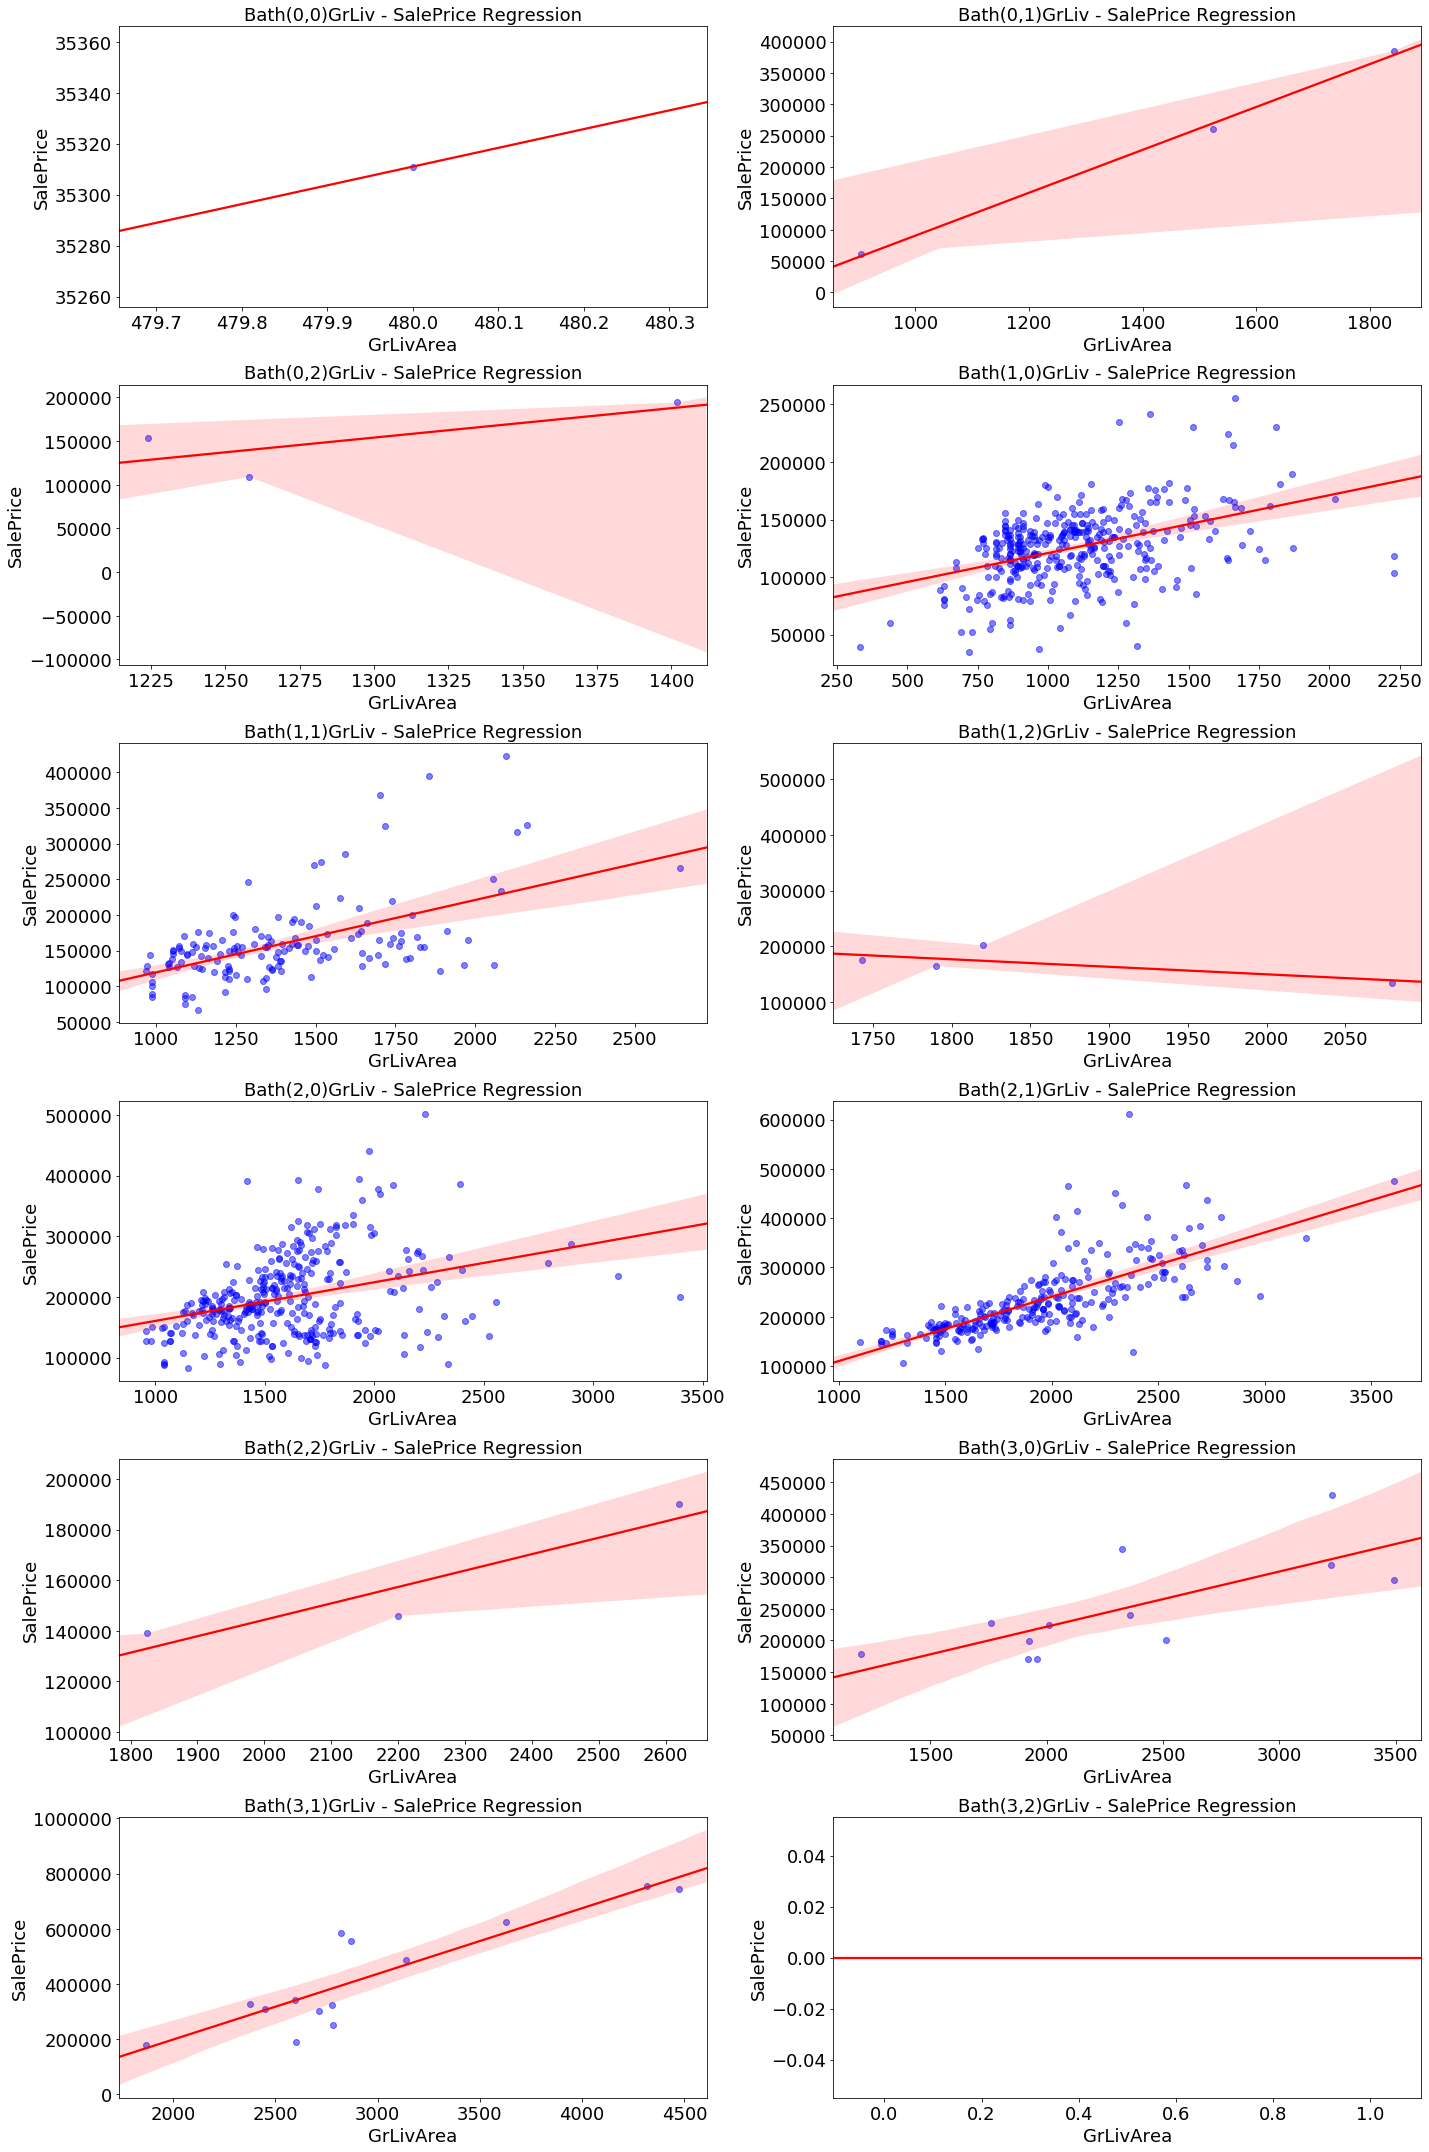

In [21]:
def draw_regplot(dataframe,row,col):
    fig = plt.figure(figsize=(20,30))
    k=1
    for i in range(0,4):
        for j in range(0,3):
            ax=fig.add_subplot(row,col,k)
            sns.regplot(x = 'GrLivArea', y = 'SalePrice', order = 1,
                        data = dataframe.loc[(dataframe['FullBath'] == int(i) ) & (dataframe['HalfBath']== int(j)), ['GrLivArea', 'SalePrice']], 
                        ax = ax, line_kws = {'color' : 'red'}, scatter_kws = {'color' : 'blue', 'alpha' : 0.5})

            plt.ylabel('SalePrice', fontsize=18)
            plt.xlabel('GrLivArea', fontsize=18)
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.title('Bath('+str(i)+','+str(j)+')'+ 'GrLiv - SalePrice Regression',fontsize=18)
            k=k+1

    fig.tight_layout()
    plt.show()

draw_regplot(df_train,6,2)

Text(0.5, 0, 'Bath')

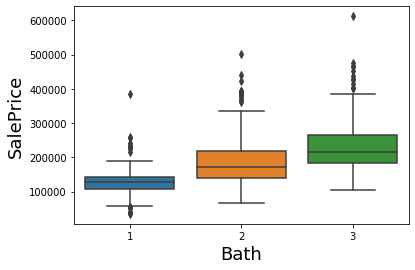

In [22]:
testTrain = df_train.loc[:, ['GrLivArea', 'SalePrice']].copy()
testTrain['Bath'] = df_train[['FullBath', 'HalfBath']].sum(axis = 1)
sns.boxplot(x = 'Bath', y = 'SalePrice', order= [1,2,3], data =testTrain)
plt.ylabel('SalePrice', fontsize=18)
plt.xlabel('Bath', fontsize=18)

SalePrice is directly proportional to the number of baths

Also for Bath(2,1) linearity is improved and spreadness is also decreased for SalePrice-GrLivArea

Text(0.5, 1, 'TotRomm - Bedroom Num')

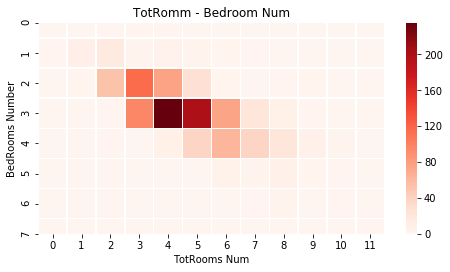

In [23]:
plt.figure(figsize = (12,6))
ax = plt.subplot2grid((3,3), (0,0), rowspan = 2, colspan = 2)
bath = ['BedroomAbvGr', 'TotRmsAbvGrd']
test = pd.crosstab(df_train[bath[0]], df_train[bath[1]])
sns.heatmap(test.values, cmap = plt.cm.Reds, ax = ax, linewidths=.5)
ax.set_ylabel('BedRooms Number')
ax.set_xlabel('TotRooms Num')
ax.set_title('TotRomm - Bedroom Num')

In [24]:
test

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14
BedroomAbvGr,,,,,,,,,,,,
0,0,0,1,2,1,0,0,0,0,0,0,0
1,1,9,16,3,4,3,2,1,0,0,0,0
2,0,2,53,116,77,28,2,0,1,2,0,0
3,0,0,1,96,235,199,76,22,8,1,0,0
4,0,0,1,0,8,38,63,38,22,7,3,0
5,0,0,0,0,0,0,5,3,7,2,1,0
6,0,0,0,0,0,0,0,1,3,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,1


From Heat map we can say that most people are looking for houses having total rooms of range (4,10) and bedrooms of range (2,4)

C:\Users\Amith Reddy\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


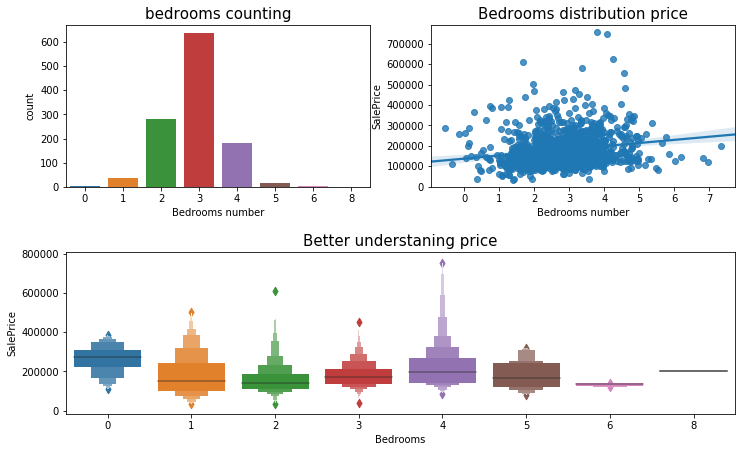

In [25]:

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="BedroomAbvGr", data=df_train,ax=ax1)
ax1.set_title("bedrooms counting", fontsize=15)
ax1.set_xlabel("Bedrooms number")
ax1.set_ylabel("count")

ax2 = plt.subplot(222)
ax2 = sns.regplot(x="BedroomAbvGr", y='SalePrice',data=df_train, ax=ax2, x_jitter=True)
ax2.set_title("Bedrooms distribution price", fontsize=15)
ax2.set_xlabel("Bedrooms number")
ax2.set_ylabel("SalePrice")

ax0 = plt.subplot(212)
ax0 = sns.lvplot(x="BedroomAbvGr", y="SalePrice",data=df_train)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("Bedrooms")
ax0.set_ylabel("SalePrice")

plt.show()

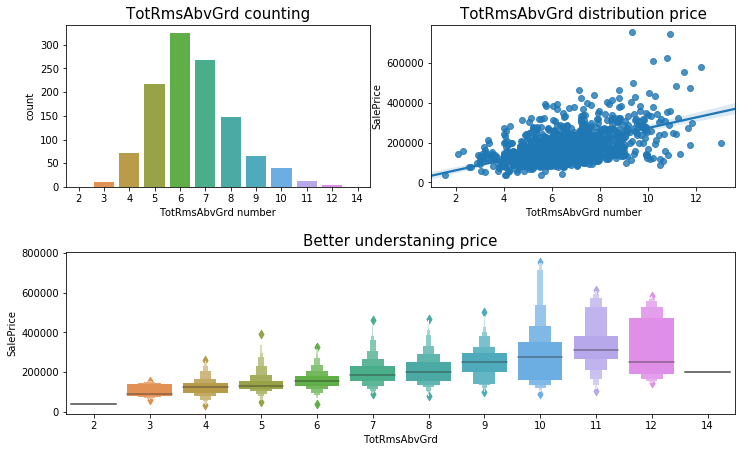

In [26]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="TotRmsAbvGrd", data=df_train,ax=ax1)
ax1.set_title("TotRmsAbvGrd counting", fontsize=15)
ax1.set_xlabel("TotRmsAbvGrd number")
ax1.set_ylabel("count")

ax2 = plt.subplot(222)
ax2 = sns.regplot(x="TotRmsAbvGrd", y='SalePrice',data=df_train, ax=ax2,x_jitter=True)
ax2.set_title("TotRmsAbvGrd distribution price", fontsize=15)
ax2.set_xlabel("TotRmsAbvGrd number")
ax2.set_ylabel("SalePrice")

ax0 = plt.subplot(212)
ax0 = sns.boxenplot(x="TotRmsAbvGrd", y="SalePrice",data=df_train)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("TotRmsAbvGrd")
ax0.set_ylabel("SalePrice")

plt.show()

TOtal rooms is having a linear relationship with the sale price, more the rooms saleprice also increases

In [27]:
#Clearly view of bathrooms and bedrooms correlation

bath = ['FullBath', 'BedroomAbvGr']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[bath[0]], df_train[bath[1]]).style.background_gradient(cmap = cm)

BedroomAbvGr,0,1,2,3,4,5,6,8
FullBath,,,,,,,,
0,3,2,2,0,0,0,0,0
1,1,32,168,286,32,5,0,0
2,0,5,111,346,132,9,5,1
3,0,0,0,6,16,4,0,0


In [28]:
bath = ['HalfBath', 'BedroomAbvGr']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[bath[0]], df_train[bath[1]]).style.background_gradient(cmap = cm)

BedroomAbvGr,0,1,2,3,4,5,6,8
HalfBath,,,,,,,,
0,0,27,237,372,69,13,5,1
1,3,12,42,265,106,4,0,0
2,1,0,2,1,5,1,0,0


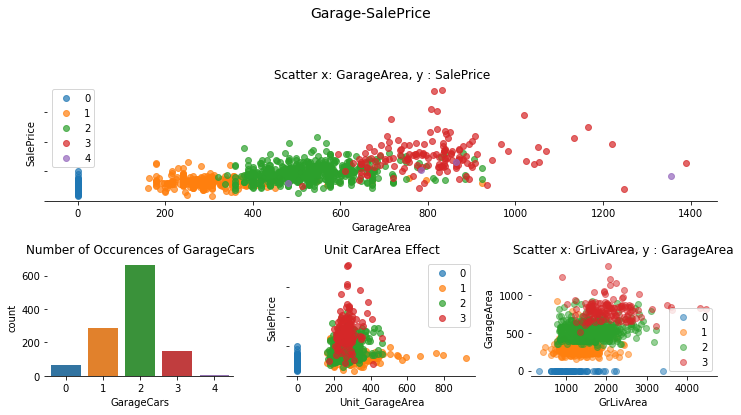

In [30]:
garage = ['GarageCars', 'GarageArea']
plt.figure(figsize = (12,6))
ax2 = plt.subplot2grid((2,3), (1,0))
sns.countplot(df_train['GarageCars'], ax = ax2)
ax2.set_title('Number of Occurences of GarageCars')

ax3 = plt.subplot2grid((2,3), (0,0), colspan = 3)
for val in range(5):
    indexV = df_train.GarageCars == val
    ax3.plot(df_train['GarageArea'].loc[indexV], df_train['SalePrice'].loc[indexV], marker = 'o', linestyle = '', label = val, alpha = 0.7)
ax3.set_xlabel('GarageArea')
ax3.set_ylabel('SalePrice')
ax3.set_title('Scatter x: GarageArea, y : SalePrice')
ax3.set_yticklabels([])
ax3.legend()

ax = plt.subplot2grid((2,3), (1,2))
num = [0,1,2,3]
for val in num:
    index = df_train.GarageCars == val
    ax.scatter(df_train.GrLivArea.loc[index], df_train.GarageArea.loc[index], label = val, alpha = 0.5)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_title('Scatter x: GrLivArea, y : GarageArea')
ax.legend()

def functions(x):
    if x['GarageCars'] == 0: return 0
    else:
        return x['GarageArea']/ x['GarageCars']
unitCarArea = df_train.apply(functions, axis = 1)

ax3= plt.subplot2grid((2,3), (1,1))
for val in range(4):
    indexV = df_train.GarageCars == val
    ax3.plot(unitCarArea.loc[indexV], df_train['SalePrice'].loc[indexV], marker = 'o', linestyle = '', label = val, alpha = 0.7)
ax3.set_xlabel('Unit_GarageArea')
ax3.set_ylabel('SalePrice')
ax3.set_title('Unit CarArea Effect')
ax3.set_yticklabels([])
ax3.legend()

sns.despine(left = True)
plt.subplots_adjust(wspace = 0.3, hspace = 0.5, top =0.8)
plt.suptitle('Garage-SalePrice', fontsize = 14)
plt.show()

Most of the Houses are having 2 cars

Garage area is having  a linear relationship with the saleprice

0 Cars and 1 Cars has no difference in SalePrice

From Unit Garagearea we can wee that higher sale prices are maintaining the unit garage area relationship

In [35]:
outSide = ['OpenPorchSF', 'Fireplaces','WoodDeckSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea']
dfOut = df_train[outSide].copy()
for x in outSide:
    dfOut[x].loc[dfOut[x] != 0] = 'Not'
    dfOut[x].loc[dfOut[x] == 0] = 'Exist'
dfOut = dfOut.apply(pd.Series.value_counts).T

In [32]:
dfOut

,Exist,Not
OpenPorchSF,531,635
Fireplaces,551,615
WoodDeckSF,603,563
EnclosedPorch,997,169
3SsnPorch,1144,22
ScreenPorch,1071,95
PoolArea,1160,6


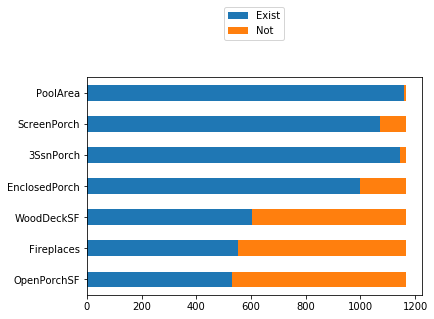

In [33]:
dfOut.plot(kind='barh', stacked = True)
plt.legend(loc=8,bbox_to_anchor=(0.5, 1.15))

PoolArea, ScreenPorch, 3SsnPorch, Enclosed porch are almost available


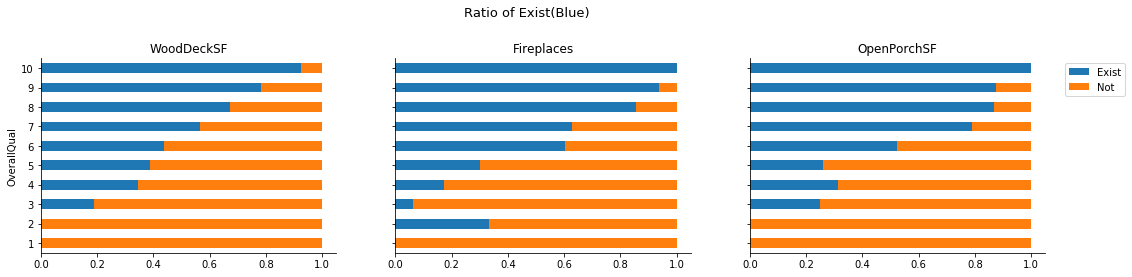

In [38]:
plt.figure(figsize = (18,4))

ax1 = plt.subplot2grid((1,3), (0,0))
ax2 = plt.subplot2grid((1,3), (0,1))
ax3 = plt.subplot2grid((1,3), (0,2))

for x, axis in zip(['WoodDeckSF', 'Fireplaces', 'OpenPorchSF'], [ax1, ax2, ax3]):
    dfOut = df_train[[x, 'OverallQual']].copy()
    dfOut[x].loc[dfOut[x] != 0] = 'Exist'
    dfOut[x].loc[dfOut[x] == 0] = 'Not'
    tmp = pd.crosstab(dfOut[x], dfOut['OverallQual']).T
    tmp = tmp.divide(tmp.sum(axis = 1), axis = 0)
    tmp.plot.barh(stacked = True, ax = axis, legend = False)
    axis.set_title(x)
ax3.legend(bbox_to_anchor = [1.05, 1])
ax2.set_ylabel('')
ax3.set_ylabel('')
ax2.set_yticklabels('')
ax3.set_yticklabels('')
plt.subplots_adjust(top = 0.8)
plt.suptitle('Ratio of Exist(Blue)', fontsize = 13)
sns.despine()
plt.show()

#### Good Quality House has more outside amenities

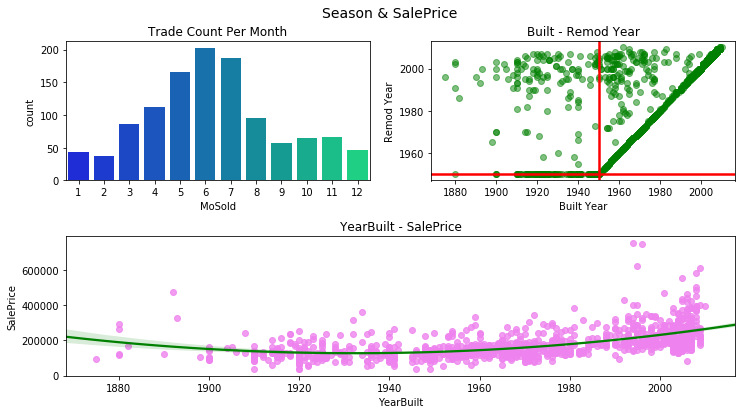

In [50]:
season = ['YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice']
plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0))
sns.countplot(x = 'MoSold', palette = sns.color_palette('winter', 12), data =df_train, ax = ax1)
ax1.set_title('Trade Count Per Month')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(x = df_train['YearBuilt'], y = df_train['YearRemodAdd'], alpha = 0.5, color = 'g')
ax2.axvline(1950, color = 'red', linewidth = 2.5)
ax2.axhline(1950, color = 'red', linewidth = 2.5)
ax2.set_xlabel('Built Year')
ax2.set_ylabel('Remod Year')
ax2.set_title('Built - Remod Year')

ax3 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.regplot(x = 'YearBuilt', y = 'SalePrice', color = 'violet', order = 2, line_kws = {'color' : 'green'}, ax = ax3, data =df_train)
ax3.set_title('YearBuilt - SalePrice')
plt.subplots_adjust(top = 0.9, hspace = 0.4)
plt.suptitle('Season & SalePrice', fontsize = 14)
#sns.despine()
plt.show()

After 1950 no houses are remodeled

Most houses built in 1950 are remodeled

Amount of trade is increased in the month of range (Mar-Aug) i.e. Spring & summer season

In [51]:
df_train.shape

(1166, 75)

In [52]:
df_test.shape

(292, 74)

In [55]:
dict(df_train.nunique())

{'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 890,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 1,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 110,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 7,
 'Exterior1st': 14,
 'Exterior2nd': 15,
 'MasVnrType': 4,
 'MasVnrArea': 281,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinSF1': 549,
 'BsmtFinType2': 7,
 'BsmtFinSF2': 122,
 'BsmtUnfSF': 681,
 'TotalBsmtSF': 634,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 667,
 '2ndFlrSF': 349,
 'LowQualFinSF': 21,
 'GrLivArea': 744,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,
 'Functional': 7,
 'Firepl

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Target column
target_col = ['SalePrice']

#Categorical columns
cat_cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
            'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
            'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

#numerical columns
num_cols = [x for x in df_train.columns if x not in cat_cols + target_col ]

#Binary columns with 2 values
bin_cols = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

#columns more than 2 values
multi_cols = [i for i in cat_cols if i  not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    df_train[i] = le.fit_transform(df_train[i])

#Duplicating columns for the multi value columns
df_train = pd.get_dummies(data=df_train,columns = multi_cols)
df_train.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,76.897638,4928,1,6,5,1976,1976,0.0,120,...,0,0,0,1,0,0,0,0,1,0
1,20,95.000000,15865,1,8,6,1970,1970,0.0,351,...,0,0,0,1,0,0,0,0,1,0
2,60,92.000000,9920,1,7,5,1996,1997,0.0,862,...,0,0,0,1,0,0,0,0,1,0
3,20,105.000000,11751,1,6,6,1977,1977,480.0,705,...,0,0,0,0,0,0,0,0,1,0
4,20,76.897638,16635,1,6,7,1977,2000,126.0,1246,...,0,0,0,1,0,0,0,0,1,0


In [84]:
df_test = pd.get_dummies(data=df_test)

In [59]:
from sklearn.model_selection import train_test_split

X=df_train.drop(['SalePrice'],axis=1).values
y = df_train['SalePrice'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

LRmodel = LinearRegression()
LRmodel.fit(X_train,y_train)
predictions = LRmodel.predict(X_test)

test_score = r2_score(y_test,predictions)

The accuracy of testing dataset  87.75466400337216
MAE for testing set: 20006.177669036442
MSE for testing set: 842036372.3495061
RMSE for testing set: 29017.862987296397


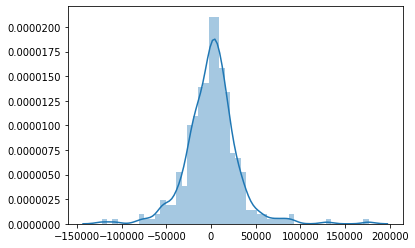

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))
sns.distplot((y_test-predictions),bins=50)

#  Support Vector Regression 

In [67]:
from sklearn.svm import SVR
svr = SVR(gamma='auto')
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)

test_score = r2_score(y_test,predictions)

The accuracy of testing dataset  -9.616979734453945
MAE for testing set: 57220.340958147644
MSE for testing set: 7537684877.6487
RMSE for testing set: 86819.84149748662


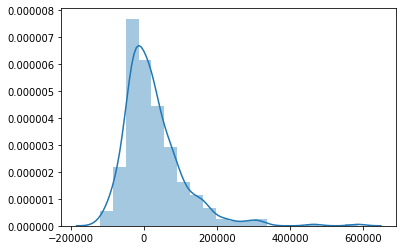

In [69]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))
sns.distplot((y_test-predictions),bins=20)

# Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)

test_score = r2_score(y_test,predictions)

The accuracy of testing dataset  73.63380553593088
MAE for testing set: 27793.805714285714
MSE for testing set: 1813040879.0171428
RMSE for testing set: 42579.817742883104


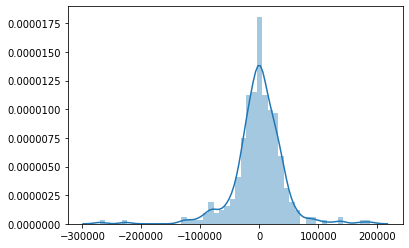

In [72]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))
sns.distplot((y_test-predictions),bins=50)

# Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)

test_score = rf_model.score(X_test,predictions)

The accuracy of testing dataset  100.0
MAE for testing set: 19511.06194285714
MSE for testing set: 853826939.6754147
RMSE for testing set: 29220.317241183653


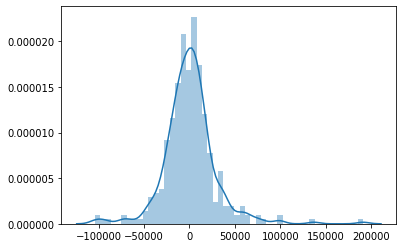

In [77]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))
sns.distplot((y_test-predictions),bins=50)

# Finding the best Parameters

In [130]:
coef = LRmodel.coef_
coef = [abs(number) for number in coef]
print (coef)

[32.186272463580906, 68.91262676156448, 0.722263534400998, 57254.53392864335, 7248.657045151433, 5947.886854631692, 287.72575670187837, 94.30686727346057, 10.693395315078618, 18.622570130127855, 4.968501187005188, 1.8080588052248459, 21.783017295666014, 323.176543650281, 13.79583097910404, 22.200640472448413, 12.169883533784741, 48.166361885040715, 1254.9408021499971, 174.70695146134676, 4375.292364929352, 2223.83609217831, 3947.8844957822175, 16874.02483160184, 1514.477921495456, 2435.225327209504, 132.43135642642096, 1610.30211056577, 13.696147284077597, 10.769970399232989, 9.680444307259677, 5.775337139554722, 20.958655616339, 16.23423332206994, 45.38296162496681, 0.31064635200891644, 442.11324716553645, 380.4627862902198, 25083.790931703723, 14112.938471323145, 8775.454418794097, 6071.325466699989, 3875.9274249888094, 475.07010383579745, 4426.7165057484235, 5639.7858593843275, 1688.139457409331, 7279.274200565354, 13016.785157490089, 21604.03107929645, 1307.9717212926387, 1.4663328

In [131]:
cols=list(df_train.columns)
cols.index("SalePrice")

38

In [132]:
del cols[38]


In [133]:
#Sorting on Feature Importance
sorted_index = sorted(range(len(coef)),key= lambda k: coef[k], reverse = True)
feature=[]
for idx in sorted_index:
    print(cols[idx])
    feature.append(cols[idx])

Condition2_RRAe
RoofStyle_Shed
RoofMatl_WdShake
RoofMatl_Membran
RoofMatl_Metal
Street
GarageFinish_NA
GarageType_NA
GarageCond_NA
GarageQual_NA
RoofMatl_Roll
HouseStyle_2.5Fin
RoofStyle_Flat
Foundation_Wood
RoofMatl_WdShngl
Neighborhood_StoneBr
Exterior2nd_Stone
Exterior1st_Stone
Exterior2nd_AsphShn
RoofStyle_Gambrel
Condition2_Artery
Condition2_Norm
Exterior2nd_Other
Heating_Wall
RoofMatl_CompShg
BsmtCond_Po
Exterior1st_CemntBd
SaleType_New
Functional_Sev
Neighborhood_MeadowV
GarageQual_Po
Condition2_RRAn
MSZoning_C (all)
Exterior2nd_CmentBd
RoofMatl_Tar&Grv
LandContour_Low
Functional_Typ
RoofStyle_Hip
RoofStyle_Gable
HouseStyle_1.5Unf
SaleCondition_Partial
GarageFinish_RFn
Neighborhood_Gilbert
ExterCond_Ex
Condition2_PosA
GarageFinish_Unf
SaleType_ConLI
GarageCond_Po
Neighborhood_SWISU
SaleType_ConLD
GarageFinish_Fin
KitchenAbvGr
ExterQual_TA
BldgType_1Fam
Neighborhood_Timber
Heating_Grav
RoofStyle_Mansard
Foundation_Stone
ExterQual_Ex
Neighborhood_NPkVill
Neighborhood_Crawfor
Condi

In [142]:
coe=pd.DataFrame()
coe['Feature'] = cols
coe['Value'] = coef
coe.head(50)

,Feature,Value
0,MSSubClass,32.186272
1,LotFrontage,68.912627
2,LotArea,0.722264
3,Street,57254.533929
4,OverallQual,7248.657045
5,OverallCond,5947.886855
6,YearBuilt,287.725757
7,YearRemodAdd,94.306867
8,MasVnrArea,10.693395
9,BsmtFinSF1,18.622570


# Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline


param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

forest_model = RandomForestRegressor()
# train across 5 folds , that's a total of (12+6)*5 = 90 rounds of training

grid_search = GridSearchCV(forest_model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)


C:\Users\Amith Reddy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [79]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [80]:
from pickle import dump
model = grid_search.best_estimator_
dump(model,open('model.pkl','wb'))
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [99]:

rf_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rf_random.fit(X_train,y_train)
predictions = rf_random.predict(X_test)

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 21004.070952380953
MSE: 1207498868.4016602
RMSE: 34749.08442537242


In [85]:
df_train_new = df_train.drop(['SalePrice'],axis=1)
df_test = df_test.reindex(columns = df_train_new.columns, fill_value=0)

In [96]:
test = pd.read_csv(r"C:\Users\Amith Reddy\Downloads\Data Trained\FlipRobo\Assignment_10(Housing)\Project-Housing_splitted\test.csv")

from pickle import load
model = load(open('model.pkl','rb'))
Sale_Price = model.predict(df_test)
final_submission = pd.DataFrame({'Id': test.Id,'SalePrice': Sale_Price})

final_submission.to_csv('final_submission.csv',index=False)

In [97]:
final_submission.head()

,Id,SalePrice
0,337,268797.333333
1,1018,181578.100000
2,929,222523.333333
3,1148,171230.133333
4,1227,229641.666667
